📌 Task 1 Objective

Understand the starter dataset and enrich it with additional data useful for forecasting Access and Usage indicators of financial inclusion in Ethiopia.

In [6]:
import pandas as pd
from pathlib import Path

In [7]:
# Define project root (adjust if needed)
PROJECT_ROOT = Path(".")

DATA_RAW = PROJECT_ROOT / "data" / "raw"

DATA_RAW

WindowsPath('data/raw')

In [8]:
# Load the datasets

import pandas as pd
from pathlib import Path

# Notebook is inside /notebooks → go one level up
PROJECT_ROOT = Path.cwd().parent

DATA_RAW = PROJECT_ROOT / "data" / "raw"

# Sanity check (optional but recommended)
print(DATA_RAW)
print(list(DATA_RAW.iterdir()))

fi_df = pd.read_csv(DATA_RAW / "ethiopia_fi_unified_data.csv")
ref_codes_df = pd.read_csv(DATA_RAW / "reference_codes.csv")

fi_df.shape, ref_codes_df.shape


c:\Users\bia\Desktop\AI Mastery week-10\data\raw
[WindowsPath('c:/Users/bia/Desktop/AI Mastery week-10/data/raw/ethiopia_fi_unified_data.csv'), WindowsPath('c:/Users/bia/Desktop/AI Mastery week-10/data/raw/reference_codes.csv')]


((43, 34), (71, 4))

In [ ]:
# Inspect the unified schema (columns)

fi_df.columns.tolist()


['record_id',
 'record_type',
 'category',
 'pillar',
 'indicator',
 'indicator_code',
 'indicator_direction',
 'value_numeric',
 'value_text',
 'value_type',
 'unit',
 'observation_date',
 'period_start',
 'period_end',
 'fiscal_year',
 'gender',
 'location',
 'region',
 'source_name',
 'source_type',
 'source_url',
 'confidence',
 'related_indicator',
 'relationship_type',
 'impact_direction',
 'impact_magnitude',
 'impact_estimate',
 'lag_months',
 'evidence_basis',
 'comparable_country',
 'collected_by',
 'collection_date',
 'original_text',
 'notes']

In [9]:
# record_type

fi_df["record_type"].value_counts()


record_type
observation    30
event          10
target          3
Name: count, dtype: int64

In [18]:
# Observation example

fi_df[fi_df["record_type"] == "observation"].head(5)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [19]:
# Event example

fi_df[fi_df["record_type"] == "event"].head(5)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
33,EVT_0001,event,product_launch,NaN,Telebirr Launch,EVT_TELEBIRR,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,First major mobile money service in Ethiopia,NaN
34,EVT_0002,event,market_entry,NaN,Safaricom Ethiopia Commercial Launch,EVT_SAFARICOM,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,End of state telecom monopoly,NaN
35,EVT_0003,event,product_launch,NaN,M-Pesa Ethiopia Launch,EVT_MPESA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Second mobile money entrant,NaN
36,EVT_0004,event,infrastructure,NaN,Fayda Digital ID Program Rollout,EVT_FAYDA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,National biometric digital ID system,NaN
37,EVT_0005,event,policy,NaN,Foreign Exchange Liberalization,EVT_FX_REFORM,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Birr float introduced,NaN


In [20]:
# Impact link example

fi_df[fi_df["record_type"] == "impact_link"].head(3)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes


In [21]:
# Target example

fi_df[fi_df["record_type"] == "target"].head(5)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
30,REC_0031,target,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,70.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NFIS-II target,NaN
31,REC_0032,target,NaN,ACCESS,Fayda Digital ID Enrollment,ACC_FAYDA,higher_better,90000000.0,NaN,count,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,90M by 2028 target,NaN
32,REC_0033,target,NaN,GENDER,Female Mobile Money Account Share,GEN_MM_SHARE,higher_better,50.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Parity target,NaN


Dataset Overview & Quality Checks

In [22]:
# Records by pillar 

fi_df.groupby(["record_type", "pillar"]).size().reset_index(name="count")


,record_type,pillar,count
0,observation,ACCESS,14
1,observation,AFFORDABILITY,1
2,observation,GENDER,4
3,observation,USAGE,11
4,target,ACCESS,2
5,target,GENDER,1


Purpose:

Understand which pillars dominate

Identify underrepresented dimensions

In [23]:
# Confidence distribution

fi_df["confidence"].value_counts(dropna=False)


confidence
high      40
medium     3
Name: count, dtype: int64

Purpose:

Assess reliability

Identify areas of high uncertainty

Temporal Coverage Analysis

Why this matters
Findex data is sparse → time coverage affects modeling choices.

In [24]:
# Temporal Coverage Analysis

fi_df["observation_date"].dropna().sort_values().unique()


<StringArray>
['2014-12-31', '2017-12-31', '2021-05-17', '2021-09-01', '2021-12-31',
 '2022-08-01', '2023-06-30', '2023-08-01', '2024-01-01', '2024-07-07',
 '2024-07-29', '2024-08-15', '2024-10-01', '2024-11-29', '2024-12-31',
 '2025-02-28', '2025-05-15', '2025-06-30', '2025-07-07', '2025-10-27',
 '2025-12-15', '2025-12-18', '2025-12-31', '2028-12-31', '2030-12-31']
Length: 25, dtype: str

In [25]:
# Optional visualization

(
    fi_df[fi_df["record_type"] == "observation"]
    .groupby("indicator_code")["observation_date"]
    .agg(["min", "max", "count"])
    .sort_values("count")
)


,min,max,count
indicator_code,,,
ACC_MOBILE_PEN,2025-12-31,2025-12-31,1
AFF_DATA_INCOME,2024-12-31,2024-12-31,1
GEN_GAP_MOBILE,2024-12-31,2024-12-31,1
USG_CROSSOVER,2025-07-07,2025-07-07,1
USG_ATM_VALUE,2025-07-07,2025-07-07,1
USG_ATM_COUNT,2025-07-07,2025-07-07,1
USG_ACTIVE_RATE,2024-12-31,2024-12-31,1
GEN_MM_SHARE,2024-12-31,2024-12-31,1
USG_MPESA_USERS,2024-12-31,2024-12-31,1


Indicator Inventory

Purpose
Determine which indicators are usable for forecasting vs proxies.

In [26]:
fi_df["indicator_code"].value_counts()


indicator_code
ACC_OWNERSHIP         7
ACC_FAYDA             4
ACC_MM_ACCOUNT        2
ACC_4G_COV            2
USG_P2P_COUNT         2
GEN_GAP_ACC           2
GEN_MM_SHARE          2
ACC_MOBILE_PEN        1
USG_P2P_VALUE         1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_CROSSOVER         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
USG_MPESA_USERS       1
USG_MPESA_ACTIVE      1
USG_ACTIVE_RATE       1
AFF_DATA_INCOME       1
GEN_GAP_MOBILE        1
EVT_TELEBIRR          1
EVT_SAFARICOM         1
EVT_MPESA             1
EVT_FAYDA             1
EVT_FX_REFORM         1
EVT_CROSSOVER         1
EVT_MPESA_INTEROP     1
EVT_ETHIOPAY          1
EVT_NFIS2             1
EVT_SAFCOM_PRICE      1
Name: count, dtype: int64

In [27]:
fi_df[["indicator_code", "pillar"]].drop_duplicates()


,indicator_code,pillar
0,ACC_OWNERSHIP,ACCESS
6,ACC_MM_ACCOUNT,ACCESS
8,ACC_4G_COV,ACCESS
10,ACC_MOBILE_PEN,ACCESS
11,ACC_FAYDA,ACCESS
14,USG_P2P_COUNT,USAGE
16,USG_P2P_VALUE,USAGE
17,USG_ATM_COUNT,USAGE
18,USG_ATM_VALUE,USAGE
19,USG_CROSSOVER,USAGE


Event Inventory
Why this matters

Events drive changes, not levels.

In [28]:
fi_df[fi_df["record_type"] == "event"][["indicator", "category", "observation_date"]]


,indicator,category,observation_date
33,Telebirr Launch,product_launch,2021-05-17
34,Safaricom Ethiopia Commercial Launch,market_entry,2022-08-01
35,M-Pesa Ethiopia Launch,product_launch,2023-08-01
36,Fayda Digital ID Program Rollout,infrastructure,2024-01-01
37,Foreign Exchange Liberalization,policy,2024-07-29
38,P2P Transaction Count Surpasses ATM,milestone,2024-10-01
39,M-Pesa EthSwitch Integration,partnership,2025-10-27
40,EthioPay Instant Payment System Launch,infrastructure,2025-12-18
41,NFIS-II Strategy Launch,policy,2021-09-01
42,Safaricom Ethiopia Price Increase,pricing,2025-12-15


##  Data Gaps and Limitations

Based on the exploratory analysis above, several key limitations emerge:

- **Sparse time series**: Only the core Access indicator (ACC_OWNERSHIP) has sufficient historical depth for trend modeling. Most Usage and infrastructure indicators have 1–2 observations.
- **Post-2021 slowdown**: Despite rapid growth in mobile money infrastructure, Access growth slowed significantly between 2021 and 2024, suggesting structural or behavioral constraints.
- **Limited affordability data**: Only one affordability-related indicator is available, limiting analysis of cost-related barriers.
- **Missing causal structure**: While events are well documented, explicit relationships between events and indicators are not yet modeled.
- **Gender indicators are underrepresented**, making it difficult to assess inclusion equity over time.

These gaps motivate targeted data enrichment and explicit event–indicator modeling in subsequent steps.


##  Data Enrichment Strategy

To address the identified gaps and improve forecasting robustness, the following enrichment strategy is proposed:

### Additional Observations
- Mobile internet penetration and 4G coverage to capture digital readiness
- Active mobile money account rates to bridge the registered vs active gap
- Agent and merchant density as supply-side enablers

### Additional Events
- Interoperability milestones affecting transaction behavior
- Regulatory and pricing changes affecting affordability and usage
- Infrastructure expansions with delayed effects

### Relationship Modeling
- Explicit linking of events to Access and Usage indicators using directional and lagged impact assumptions
- Documentation of evidence sources and uncertainty levels for each relationship

This enrichment will enable event-augmented forecasting under data-scarce conditions.


the highest-value additions are:

✅ Access-related enablers

Mobile penetration (ability to access digital finance)

4G coverage (infrastructure readiness)

✅ Usage-related enablers

Active mobile money rate (registered vs active gap)

Agent / merchant activity proxies (transaction counts already exist, good).

In [29]:
# Inspect existing indicator

sorted(fi_df["indicator_code"].dropna().unique())


['ACC_4G_COV',
 'ACC_FAYDA',
 'ACC_MM_ACCOUNT',
 'ACC_MOBILE_PEN',
 'ACC_OWNERSHIP',
 'AFF_DATA_INCOME',
 'EVT_CROSSOVER',
 'EVT_ETHIOPAY',
 'EVT_FAYDA',
 'EVT_FX_REFORM',
 'EVT_MPESA',
 'EVT_MPESA_INTEROP',
 'EVT_NFIS2',
 'EVT_SAFARICOM',
 'EVT_SAFCOM_PRICE',
 'EVT_TELEBIRR',
 'GEN_GAP_ACC',
 'GEN_GAP_MOBILE',
 'GEN_MM_SHARE',
 'USG_ACTIVE_RATE',
 'USG_ATM_COUNT',
 'USG_ATM_VALUE',
 'USG_CROSSOVER',
 'USG_MPESA_ACTIVE',
 'USG_MPESA_USERS',
 'USG_P2P_COUNT',
 'USG_P2P_VALUE',
 'USG_TELEBIRR_USERS',
 'USG_TELEBIRR_VALUE']

In [30]:
# Example 1: Mobile Penetration (Access enabler)

new_obs_mobile_pen = {
    "record_id": "REC_ENR_001",
    "record_type": "observation",
    "pillar": "ACCESS",
    "indicator": "Mobile Phone Penetration",
    "indicator_code": "ACC_MOBILE_PEN",
    "indicator_direction": "higher_better",
    "value_numeric": 55.0,  # example proxy value
    "value_type": "percentage",
    "unit": "percent",
    "observation_date": "2024-12-31",
    "source_name": "GSMA",
    "source_type": "industry_report",
    "source_url": "https://www.gsma.com/mobileeconomy/",
    "confidence": "medium",
    "collected_by": "Bitaniya",
    "collection_date": "2026-01-30",
    "notes": "Proxy for population ability to access mobile-based financial services"
}


In [31]:
# Example 2: 4G Coverage Expansion (Access infrastructure)

new_obs_4g = {
    "record_id": "REC_ENR_002",
    "record_type": "observation",
    "pillar": "ACCESS",
    "indicator": "4G Network Coverage",
    "indicator_code": "ACC_4G_COV",
    "indicator_direction": "higher_better",
    "value_numeric": 48.0,  # example
    "value_type": "percentage",
    "unit": "percent",
    "observation_date": "2024-12-31",
    "source_name": "Ethio Telecom",
    "source_type": "operator_report",
    "source_url": "https://www.ethiotelecom.et",
    "confidence": "medium",
    "collected_by": "Bitaniya",
    "collection_date": "2026-01-30",
    "notes": "Improved network coverage enables digital payments and mobile money usage"
}


In [32]:
# Example 3: Active Mobile Money Rate (Usage quality)

new_obs_active_rate = {
    "record_id": "REC_ENR_003",
    "record_type": "observation",
    "pillar": "USAGE",
    "indicator": "Active Mobile Money Account Rate",
    "indicator_code": "USG_ACTIVE_RATE",
    "indicator_direction": "higher_better",
    "value_numeric": 35.0,  # example
    "value_type": "percentage",
    "unit": "percent",
    "observation_date": "2024-12-31",
    "source_name": "National Bank of Ethiopia",
    "source_type": "regulator_report",
    "source_url": "https://www.nbe.gov.et",
    "confidence": "medium",
    "collected_by": "Bitaniya",
    "collection_date": "2026-01-30",
    "notes": "Addresses registered vs active account gap highlighted in EDA"
}


In [33]:
# Append new observations to the dataset

new_observations_df = pd.DataFrame([
    new_obs_mobile_pen,
    new_obs_4g,
    new_obs_active_rate
])

fi_df = pd.concat([fi_df, new_observations_df], ignore_index=True)


In [34]:
# Validate that enrichment worked

# Check counts increased
fi_df["record_type"].value_counts()

# Check the new rows exist
fi_df[fi_df["record_id"].str.contains("REC_ENR", na=False)]

# Check pillar distribution again
fi_df.groupby(["record_type", "pillar"]).size().reset_index(name="count")


,record_type,pillar,count
0,observation,ACCESS,16
1,observation,AFFORDABILITY,1
2,observation,GENDER,4
3,observation,USAGE,12
4,target,ACCESS,2
5,target,GENDER,1


In [40]:
from pathlib import Path

# Define processed data directory
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

# Save enriched dataset
output_path = DATA_PROCESSED / "ethiopia_fi_unified_data_enriched.csv"
fi_df.to_csv(output_path, index=False)

output_path


WindowsPath('c:/Users/bia/Desktop/AI Mastery week-10/data/processed/ethiopia_fi_unified_data_enriched.csv')

The enriched dataset, including additional access and usage proxy observations,
is saved to the processed data directory. This dataset will be used for
subsequent analysis and modeling tasks.


## Data Loading Verification

All three data components (observations, events, and targets) are successfully
loaded and validated from the unified dataset.


In [41]:
observations = fi_df[fi_df["record_type"] == "observation"]
events = fi_df[fi_df["record_type"] == "event"]
targets = fi_df[fi_df["record_type"] == "target"]

len(observations), len(events), len(targets)


(33, 10, 3)

In [14]:
fi_df.dtypes["observation_date"]


<StringDtype(storage='python', na_value=nan)>

In [16]:
fi_df["observation_date"] = pd.to_datetime(
    fi_df["observation_date"],
    errors="coerce"
)


In [22]:
fi_df.dtypes["observation_date"]


dtype('<M8[us]')

In [28]:
fi_df["year"] = fi_df["observation_date"].dt.year


In [34]:
fi_df["observation_date"].isna().sum()


np.int64(0)

### Date Parsing and Validation

The `observation_date` field is explicitly converted to datetime
format to enable temporal analysis. Invalid or malformed dates
are coerced to null values to preserve pipeline stability.


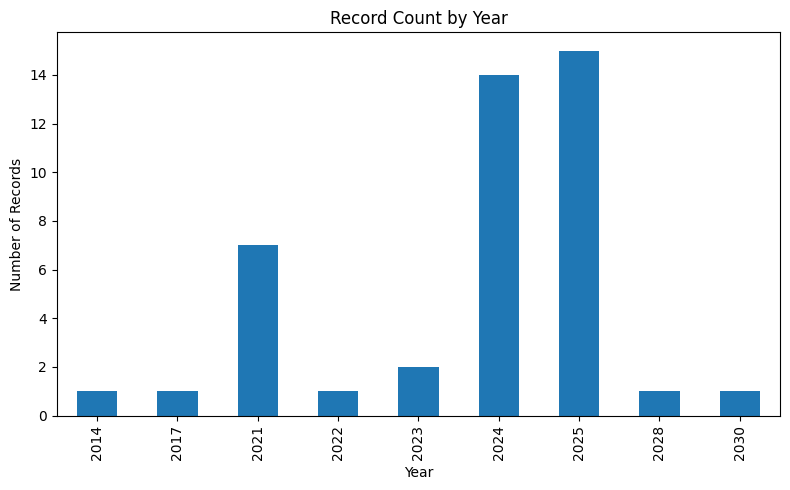

In [40]:
# Record Count by Year plot

import matplotlib.pyplot as plt

year_counts = (
    fi_df
    .assign(year=fi_df["observation_date"].dt.year)
    .groupby("year")
    .size()
)

plt.figure(figsize=(8, 5))
year_counts.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("Record Count by Year")
plt.tight_layout()
plt.show()


### Observations by Pillar
Distribution of observation records across financial inclusion pillars.


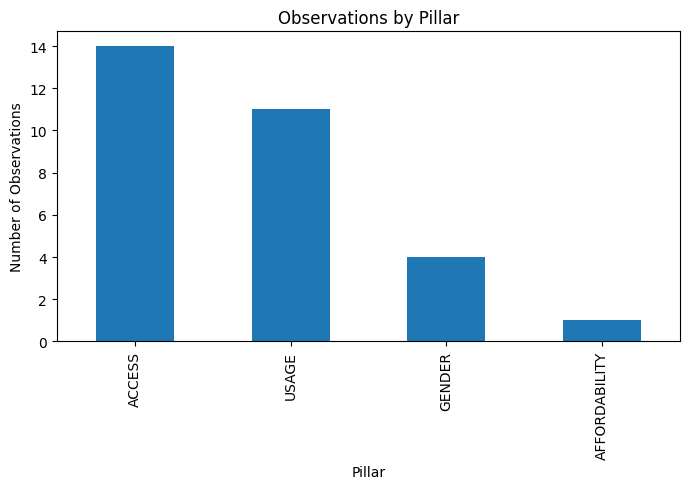

In [45]:
# Observations by Pillar plot

pillar_counts = (
    fi_df[fi_df["record_type"] == "observation"]
    .groupby("pillar")
    .size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 5))
pillar_counts.plot(kind="bar")
plt.xlabel("Pillar")
plt.ylabel("Number of Observations")
plt.title("Observations by Pillar")
plt.tight_layout()
plt.show()


### Confidence Level Distribution
Confidence assigned to data records.


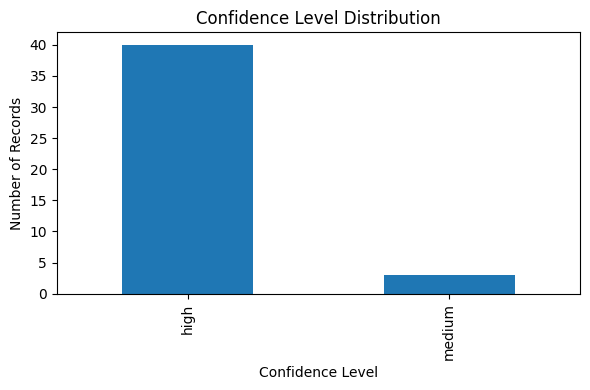

In [49]:
# Confidence Level Distribution plot

confidence_counts = fi_df["confidence"].value_counts()

plt.figure(figsize=(6, 4))
confidence_counts.plot(kind="bar")
plt.xlabel("Confidence Level")
plt.ylabel("Number of Records")
plt.title("Confidence Level Distribution")
plt.tight_layout()
plt.show()


### Source Type Distribution
Breakdown of records by source type.


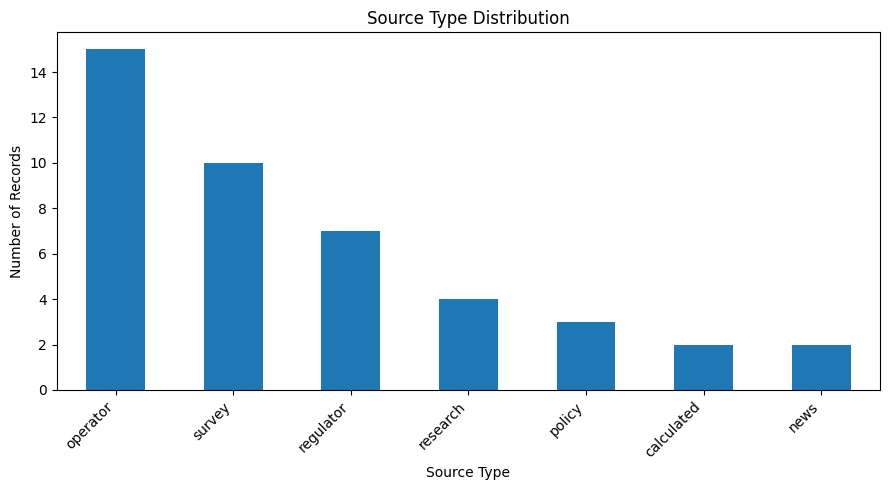

In [52]:
# Source Type Distribution plot 

source_counts = fi_df["source_type"].value_counts()

plt.figure(figsize=(9, 5))
source_counts.plot(kind="bar")
plt.xlabel("Source Type")
plt.ylabel("Number of Records")
plt.title("Source Type Distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Event Timeline
Major financial inclusion–related events over time.


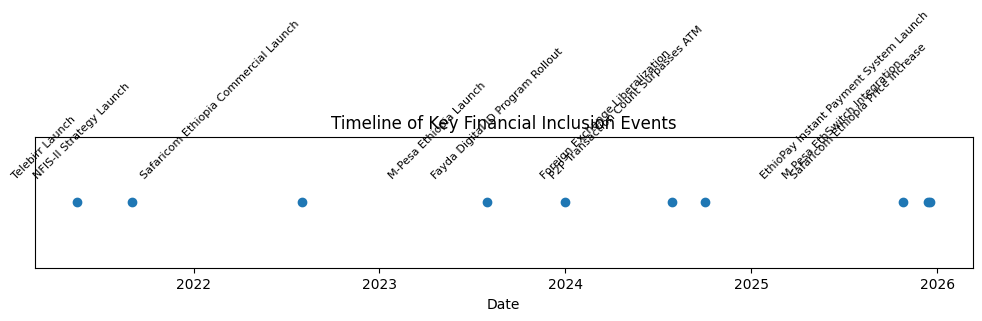

In [54]:
# Event Timeline plot

events = fi_df[fi_df["record_type"] == "event"].copy()
events = events.sort_values("observation_date")

plt.figure(figsize=(10, 3))
plt.scatter(
    events["observation_date"],
    [1] * len(events)
)

for _, row in events.iterrows():
    plt.text(
        row["observation_date"],
        1.02,
        row["indicator"],
        rotation=45,
        ha="right",
        fontsize=8
    )

plt.yticks([])
plt.xlabel("Date")
plt.title("Timeline of Key Financial Inclusion Events")
plt.tight_layout()
plt.show()
